In [1]:
import torch

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import torch.nn as nn

In [5]:
import torch.nn.functional as F

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import normalize

In [13]:
data = pd.read_csv('WineQT.csv')

In [14]:
data.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [15]:
y = data['quality'].to_numpy()
for i in range(0,len(y)):
    y[i] = y[i] - 3


In [16]:
x = data.to_numpy()
x = x[:,0:11]
x_normalized = normalize(x, norm='l2')

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y)

In [18]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(11,10)
        self.linear2 = nn.Linear(10,9)
        self.linear3 = nn.Linear(9, 6)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    

In [19]:
model = LogisticRegression()

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [21]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

In [22]:
epochs = 5000
model.train()
loss_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss_values.append(loss.item())
    pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
    acc = pred * 100.0 / len(x_train)
    print('Epoch: {}, Loss: {}, Accuracy: {}%'.format(epoch+1, loss.item(), acc.numpy()))
    loss.backward()
    optimizer.step()

Epoch: 1, Loss: 1.7205810546875, Accuracy: 40.37339401245117%
Epoch: 2, Loss: 1.7045878171920776, Accuracy: 40.37339401245117%
Epoch: 3, Loss: 1.689509630203247, Accuracy: 40.37339401245117%
Epoch: 4, Loss: 1.6745553016662598, Accuracy: 40.37339401245117%
Epoch: 5, Loss: 1.659537672996521, Accuracy: 40.37339401245117%
Epoch: 6, Loss: 1.644106388092041, Accuracy: 40.37339401245117%
Epoch: 7, Loss: 1.6282892227172852, Accuracy: 40.37339401245117%
Epoch: 8, Loss: 1.6120965480804443, Accuracy: 40.37339401245117%
Epoch: 9, Loss: 1.5954807996749878, Accuracy: 40.37339401245117%
Epoch: 10, Loss: 1.5783450603485107, Accuracy: 40.37339401245117%
Epoch: 11, Loss: 1.5606263875961304, Accuracy: 40.37339401245117%
Epoch: 12, Loss: 1.542330026626587, Accuracy: 40.37339401245117%
Epoch: 13, Loss: 1.5234880447387695, Accuracy: 38.856475830078125%
Epoch: 14, Loss: 1.5041279792785645, Accuracy: 33.83897399902344%
Epoch: 15, Loss: 1.4842485189437866, Accuracy: 32.43873977661133%
Epoch: 16, Loss: 1.463934

Epoch: 181, Loss: 1.1525728702545166, Accuracy: 45.7409553527832%
Epoch: 182, Loss: 1.1522969007492065, Accuracy: 45.7409553527832%
Epoch: 183, Loss: 1.1520178318023682, Accuracy: 45.97433090209961%
Epoch: 184, Loss: 1.1517362594604492, Accuracy: 46.20770263671875%
Epoch: 185, Loss: 1.1514511108398438, Accuracy: 46.09101486206055%
Epoch: 186, Loss: 1.1511619091033936, Accuracy: 46.20770263671875%
Epoch: 187, Loss: 1.1508687734603882, Accuracy: 46.09101486206055%
Epoch: 188, Loss: 1.1505701541900635, Accuracy: 45.97433090209961%
Epoch: 189, Loss: 1.1502724885940552, Accuracy: 46.32438659667969%
Epoch: 190, Loss: 1.1499712467193604, Accuracy: 46.32438659667969%
Epoch: 191, Loss: 1.149666666984558, Accuracy: 46.20770263671875%
Epoch: 192, Loss: 1.1493595838546753, Accuracy: 45.7409553527832%
Epoch: 193, Loss: 1.1490484476089478, Accuracy: 45.50758361816406%
Epoch: 194, Loss: 1.1487329006195068, Accuracy: 45.50758361816406%
Epoch: 195, Loss: 1.14841890335083, Accuracy: 45.27421188354492%
E

Epoch: 382, Loss: 1.059207558631897, Accuracy: 52.15869140625%
Epoch: 383, Loss: 1.058037281036377, Accuracy: 52.15869140625%
Epoch: 384, Loss: 1.0568513870239258, Accuracy: 52.15869140625%
Epoch: 385, Loss: 1.0556532144546509, Accuracy: 52.15869140625%
Epoch: 386, Loss: 1.0544413328170776, Accuracy: 52.508750915527344%
Epoch: 387, Loss: 1.053214430809021, Accuracy: 52.04200744628906%
Epoch: 388, Loss: 1.0519795417785645, Accuracy: 52.04200744628906%
Epoch: 389, Loss: 1.0507339239120483, Accuracy: 52.15869140625%
Epoch: 390, Loss: 1.0494930744171143, Accuracy: 52.15869140625%
Epoch: 391, Loss: 1.0482460260391235, Accuracy: 52.742122650146484%
Epoch: 392, Loss: 1.0469944477081299, Accuracy: 52.85881042480469%
Epoch: 393, Loss: 1.045738935470581, Accuracy: 53.20886993408203%
Epoch: 394, Loss: 1.0444856882095337, Accuracy: 53.20886993408203%
Epoch: 395, Loss: 1.0432345867156982, Accuracy: 53.32555389404297%
Epoch: 396, Loss: 1.0419882535934448, Accuracy: 53.44224166870117%
Epoch: 397, Los

Epoch: 564, Loss: 0.9680312275886536, Accuracy: 59.509918212890625%
Epoch: 565, Loss: 0.9677734971046448, Accuracy: 59.743289947509766%
Epoch: 566, Loss: 0.9675407409667969, Accuracy: 59.85997772216797%
Epoch: 567, Loss: 0.9673838019371033, Accuracy: 59.743289947509766%
Epoch: 568, Loss: 0.9672841429710388, Accuracy: 59.743289947509766%
Epoch: 569, Loss: 0.967143714427948, Accuracy: 59.62660598754883%
Epoch: 570, Loss: 0.9669173359870911, Accuracy: 59.743289947509766%
Epoch: 571, Loss: 0.9666634202003479, Accuracy: 59.743289947509766%
Epoch: 572, Loss: 0.9664623141288757, Accuracy: 59.976661682128906%
Epoch: 573, Loss: 0.9663315415382385, Accuracy: 59.85997772216797%
Epoch: 574, Loss: 0.9662094712257385, Accuracy: 59.62660598754883%
Epoch: 575, Loss: 0.9660413861274719, Accuracy: 59.62660598754883%
Epoch: 576, Loss: 0.9658289551734924, Accuracy: 59.743289947509766%
Epoch: 577, Loss: 0.9656020402908325, Accuracy: 59.976661682128906%
Epoch: 578, Loss: 0.9654185771942139, Accuracy: 59.859

Epoch: 780, Loss: 0.9442659020423889, Accuracy: 61.49358367919922%
Epoch: 781, Loss: 0.9442095160484314, Accuracy: 61.143524169921875%
Epoch: 782, Loss: 0.9441304802894592, Accuracy: 61.49358367919922%
Epoch: 783, Loss: 0.9440485835075378, Accuracy: 61.376895904541016%
Epoch: 784, Loss: 0.9439945816993713, Accuracy: 61.49358367919922%
Epoch: 785, Loss: 0.9439488649368286, Accuracy: 61.376895904541016%
Epoch: 786, Loss: 0.9438875913619995, Accuracy: 61.26020812988281%
Epoch: 787, Loss: 0.9438042640686035, Accuracy: 61.376895904541016%
Epoch: 788, Loss: 0.9437296986579895, Accuracy: 61.376895904541016%
Epoch: 789, Loss: 0.9436777234077454, Accuracy: 61.376895904541016%
Epoch: 790, Loss: 0.9436233639717102, Accuracy: 61.376895904541016%
Epoch: 791, Loss: 0.9435524344444275, Accuracy: 61.26020812988281%
Epoch: 792, Loss: 0.9434791207313538, Accuracy: 61.376895904541016%
Epoch: 793, Loss: 0.9434159994125366, Accuracy: 61.376895904541016%
Epoch: 794, Loss: 0.9433612823486328, Accuracy: 61.14

Epoch: 1020, Loss: 0.9351001381874084, Accuracy: 61.26020812988281%
Epoch: 1021, Loss: 0.9350592494010925, Accuracy: 61.02683639526367%
Epoch: 1022, Loss: 0.9350513815879822, Accuracy: 61.143524169921875%
Epoch: 1023, Loss: 0.9350486993789673, Accuracy: 61.26020812988281%
Epoch: 1024, Loss: 0.9350168704986572, Accuracy: 61.143524169921875%
Epoch: 1025, Loss: 0.9349759817123413, Accuracy: 61.143524169921875%
Epoch: 1026, Loss: 0.9349554777145386, Accuracy: 61.143524169921875%
Epoch: 1027, Loss: 0.9349507689476013, Accuracy: 61.143524169921875%
Epoch: 1028, Loss: 0.9350100755691528, Accuracy: 61.26020812988281%
Epoch: 1029, Loss: 0.9350219368934631, Accuracy: 60.79346466064453%
Epoch: 1030, Loss: 0.9349972009658813, Accuracy: 61.376895904541016%
Epoch: 1031, Loss: 0.9348927140235901, Accuracy: 61.143524169921875%
Epoch: 1032, Loss: 0.9348391890525818, Accuracy: 61.143524169921875%
Epoch: 1033, Loss: 0.9348798394203186, Accuracy: 61.26020812988281%
Epoch: 1034, Loss: 0.9349121451377869, A

Epoch: 1219, Loss: 0.9318124651908875, Accuracy: 60.56009292602539%
Epoch: 1220, Loss: 0.9316784143447876, Accuracy: 61.26020812988281%
Epoch: 1221, Loss: 0.9319952726364136, Accuracy: 61.02683639526367%
Epoch: 1222, Loss: 0.9322482943534851, Accuracy: 61.143524169921875%
Epoch: 1223, Loss: 0.9318998456001282, Accuracy: 60.910152435302734%
Epoch: 1224, Loss: 0.9315986633300781, Accuracy: 61.02683639526367%
Epoch: 1225, Loss: 0.9318164587020874, Accuracy: 60.79346466064453%
Epoch: 1226, Loss: 0.9320365190505981, Accuracy: 60.910152435302734%
Epoch: 1227, Loss: 0.9318220019340515, Accuracy: 60.79346466064453%
Epoch: 1228, Loss: 0.9315391182899475, Accuracy: 60.910152435302734%
Epoch: 1229, Loss: 0.93165522813797, Accuracy: 60.79346466064453%
Epoch: 1230, Loss: 0.9319540858268738, Accuracy: 61.26020812988281%
Epoch: 1231, Loss: 0.9318214654922485, Accuracy: 61.26020812988281%
Epoch: 1232, Loss: 0.9315582513809204, Accuracy: 60.79346466064453%
Epoch: 1233, Loss: 0.931462287902832, Accuracy

Epoch: 1355, Loss: 0.9301177263259888, Accuracy: 61.610267639160156%
Epoch: 1356, Loss: 0.9300438165664673, Accuracy: 60.79346466064453%
Epoch: 1357, Loss: 0.9299110770225525, Accuracy: 61.610267639160156%
Epoch: 1358, Loss: 0.9300086498260498, Accuracy: 61.610267639160156%
Epoch: 1359, Loss: 0.9301950335502625, Accuracy: 61.02683639526367%
Epoch: 1360, Loss: 0.9300984144210815, Accuracy: 61.49358367919922%
Epoch: 1361, Loss: 0.9298992156982422, Accuracy: 60.910152435302734%
Epoch: 1362, Loss: 0.9298592805862427, Accuracy: 61.143524169921875%
Epoch: 1363, Loss: 0.9298537373542786, Accuracy: 61.376895904541016%
Epoch: 1364, Loss: 0.9298668503761292, Accuracy: 60.676780700683594%
Epoch: 1365, Loss: 0.9299037456512451, Accuracy: 61.49358367919922%
Epoch: 1366, Loss: 0.9298966526985168, Accuracy: 60.676780700683594%
Epoch: 1367, Loss: 0.9298263192176819, Accuracy: 61.610267639160156%
Epoch: 1368, Loss: 0.9297993183135986, Accuracy: 60.910152435302734%
Epoch: 1369, Loss: 0.9297818541526794,

Epoch: 1481, Loss: 0.9286962747573853, Accuracy: 61.26020812988281%
Epoch: 1482, Loss: 0.9286220669746399, Accuracy: 62.19369888305664%
Epoch: 1483, Loss: 0.9285337924957275, Accuracy: 61.26020812988281%
Epoch: 1484, Loss: 0.9285005331039429, Accuracy: 61.8436393737793%
Epoch: 1485, Loss: 0.9284908175468445, Accuracy: 61.376895904541016%
Epoch: 1486, Loss: 0.9284771084785461, Accuracy: 61.72695541381836%
Epoch: 1487, Loss: 0.9284631609916687, Accuracy: 61.72695541381836%
Epoch: 1488, Loss: 0.9284547567367554, Accuracy: 61.49358367919922%
Epoch: 1489, Loss: 0.9284404516220093, Accuracy: 61.8436393737793%
Epoch: 1490, Loss: 0.9284310340881348, Accuracy: 61.72695541381836%
Epoch: 1491, Loss: 0.9284375309944153, Accuracy: 61.72695541381836%
Epoch: 1492, Loss: 0.9285768270492554, Accuracy: 61.376895904541016%
Epoch: 1493, Loss: 0.9286604523658752, Accuracy: 61.8436393737793%
Epoch: 1494, Loss: 0.9287068247795105, Accuracy: 61.26020812988281%
Epoch: 1495, Loss: 0.9284868240356445, Accuracy: 

Epoch: 1698, Loss: 0.9256214499473572, Accuracy: 61.49358367919922%
Epoch: 1699, Loss: 0.9256463646888733, Accuracy: 61.9603271484375%
Epoch: 1700, Loss: 0.9256462454795837, Accuracy: 61.72695541381836%
Epoch: 1701, Loss: 0.9256366491317749, Accuracy: 61.8436393737793%
Epoch: 1702, Loss: 0.9255561828613281, Accuracy: 61.610267639160156%
Epoch: 1703, Loss: 0.9254736304283142, Accuracy: 61.72695541381836%
Epoch: 1704, Loss: 0.9254263639450073, Accuracy: 61.49358367919922%
Epoch: 1705, Loss: 0.9254319071769714, Accuracy: 61.72695541381836%
Epoch: 1706, Loss: 0.925396740436554, Accuracy: 61.610267639160156%
Epoch: 1707, Loss: 0.9253121018409729, Accuracy: 61.49358367919922%
Epoch: 1708, Loss: 0.9252762198448181, Accuracy: 61.610267639160156%
Epoch: 1709, Loss: 0.9253075122833252, Accuracy: 61.9603271484375%
Epoch: 1710, Loss: 0.9253414869308472, Accuracy: 61.8436393737793%
Epoch: 1711, Loss: 0.9253500699996948, Accuracy: 61.72695541381836%
Epoch: 1712, Loss: 0.9252274632453918, Accuracy: 6

Epoch: 1890, Loss: 0.92094486951828, Accuracy: 61.49358367919922%
Epoch: 1891, Loss: 0.9210657477378845, Accuracy: 61.8436393737793%
Epoch: 1892, Loss: 0.9209989309310913, Accuracy: 61.9603271484375%
Epoch: 1893, Loss: 0.9207636117935181, Accuracy: 61.8436393737793%
Epoch: 1894, Loss: 0.9207776784896851, Accuracy: 61.610267639160156%
Epoch: 1895, Loss: 0.9209107756614685, Accuracy: 61.72695541381836%
Epoch: 1896, Loss: 0.9208035469055176, Accuracy: 61.8436393737793%
Epoch: 1897, Loss: 0.9207236766815186, Accuracy: 61.72695541381836%
Epoch: 1898, Loss: 0.9206550121307373, Accuracy: 61.8436393737793%
Epoch: 1899, Loss: 0.9206169843673706, Accuracy: 62.07701110839844%
Epoch: 1900, Loss: 0.9206246733665466, Accuracy: 61.610267639160156%
Epoch: 1901, Loss: 0.9206231236457825, Accuracy: 61.610267639160156%
Epoch: 1902, Loss: 0.9205299615859985, Accuracy: 61.9603271484375%
Epoch: 1903, Loss: 0.9204630255699158, Accuracy: 61.72695541381836%
Epoch: 1904, Loss: 0.9204366207122803, Accuracy: 61.8

Epoch: 2067, Loss: 0.9157260656356812, Accuracy: 62.07701110839844%
Epoch: 2068, Loss: 0.9154746532440186, Accuracy: 62.777130126953125%
Epoch: 2069, Loss: 0.9153764247894287, Accuracy: 62.310386657714844%
Epoch: 2070, Loss: 0.9153598546981812, Accuracy: 61.8436393737793%
Epoch: 2071, Loss: 0.9153478741645813, Accuracy: 62.42707061767578%
Epoch: 2072, Loss: 0.9153068661689758, Accuracy: 61.9603271484375%
Epoch: 2073, Loss: 0.9152570366859436, Accuracy: 61.9603271484375%
Epoch: 2074, Loss: 0.9152233600616455, Accuracy: 62.42707061767578%
Epoch: 2075, Loss: 0.9151935577392578, Accuracy: 61.8436393737793%
Epoch: 2076, Loss: 0.9151627421379089, Accuracy: 62.19369888305664%
Epoch: 2077, Loss: 0.9151325821876526, Accuracy: 62.310386657714844%
Epoch: 2078, Loss: 0.9151051640510559, Accuracy: 61.8436393737793%
Epoch: 2079, Loss: 0.9151666760444641, Accuracy: 62.66044235229492%
Epoch: 2080, Loss: 0.9152489304542542, Accuracy: 62.07701110839844%
Epoch: 2081, Loss: 0.9154602289199829, Accuracy: 6

Epoch: 2259, Loss: 0.9104170799255371, Accuracy: 62.19369888305664%
Epoch: 2260, Loss: 0.911152184009552, Accuracy: 61.49358367919922%
Epoch: 2261, Loss: 0.9107134938240051, Accuracy: 62.310386657714844%
Epoch: 2262, Loss: 0.9101577997207642, Accuracy: 62.310386657714844%
Epoch: 2263, Loss: 0.9099759459495544, Accuracy: 62.310386657714844%
Epoch: 2264, Loss: 0.9101645350456238, Accuracy: 62.07701110839844%
Epoch: 2265, Loss: 0.9104873538017273, Accuracy: 61.72695541381836%
Epoch: 2266, Loss: 0.9101014137268066, Accuracy: 62.42707061767578%
Epoch: 2267, Loss: 0.9099323153495789, Accuracy: 62.19369888305664%
Epoch: 2268, Loss: 0.9098536968231201, Accuracy: 62.310386657714844%
Epoch: 2269, Loss: 0.909980058670044, Accuracy: 62.310386657714844%
Epoch: 2270, Loss: 0.9102008938789368, Accuracy: 61.610267639160156%
Epoch: 2271, Loss: 0.9100978970527649, Accuracy: 61.8436393737793%
Epoch: 2272, Loss: 0.9100275039672852, Accuracy: 61.9603271484375%
Epoch: 2273, Loss: 0.90973961353302, Accuracy:

Epoch: 2474, Loss: 0.9054615497589111, Accuracy: 61.376895904541016%
Epoch: 2475, Loss: 0.9058957099914551, Accuracy: 62.310386657714844%
Epoch: 2476, Loss: 0.9058344960212708, Accuracy: 61.49358367919922%
Epoch: 2477, Loss: 0.9054520726203918, Accuracy: 62.07701110839844%
Epoch: 2478, Loss: 0.9053660035133362, Accuracy: 62.19369888305664%
Epoch: 2479, Loss: 0.9053636789321899, Accuracy: 61.8436393737793%
Epoch: 2480, Loss: 0.9054169654846191, Accuracy: 62.19369888305664%
Epoch: 2481, Loss: 0.9053640365600586, Accuracy: 61.26020812988281%
Epoch: 2482, Loss: 0.9052738547325134, Accuracy: 61.8436393737793%
Epoch: 2483, Loss: 0.9051991105079651, Accuracy: 61.8436393737793%
Epoch: 2484, Loss: 0.9052110314369202, Accuracy: 61.49358367919922%
Epoch: 2485, Loss: 0.9054679870605469, Accuracy: 62.19369888305664%
Epoch: 2486, Loss: 0.9056228399276733, Accuracy: 61.49358367919922%
Epoch: 2487, Loss: 0.9056899547576904, Accuracy: 61.9603271484375%
Epoch: 2488, Loss: 0.9053038358688354, Accuracy: 6

Epoch: 2672, Loss: 0.9032279849052429, Accuracy: 62.543758392333984%
Epoch: 2673, Loss: 0.902678906917572, Accuracy: 61.610267639160156%
Epoch: 2674, Loss: 0.9027417302131653, Accuracy: 61.610267639160156%
Epoch: 2675, Loss: 0.9037567377090454, Accuracy: 62.42707061767578%
Epoch: 2676, Loss: 0.9037079811096191, Accuracy: 61.610267639160156%
Epoch: 2677, Loss: 0.9028700590133667, Accuracy: 62.310386657714844%
Epoch: 2678, Loss: 0.9026317000389099, Accuracy: 61.610267639160156%
Epoch: 2679, Loss: 0.9032471776008606, Accuracy: 61.376895904541016%
Epoch: 2680, Loss: 0.9030667543411255, Accuracy: 62.543758392333984%
Epoch: 2681, Loss: 0.9024364948272705, Accuracy: 61.9603271484375%
Epoch: 2682, Loss: 0.9032577276229858, Accuracy: 61.610267639160156%
Epoch: 2683, Loss: 0.9039453864097595, Accuracy: 62.42707061767578%
Epoch: 2684, Loss: 0.9030401110649109, Accuracy: 61.376895904541016%
Epoch: 2685, Loss: 0.9024990200996399, Accuracy: 62.07701110839844%
Epoch: 2686, Loss: 0.9027518630027771, A

Epoch: 2846, Loss: 0.900795578956604, Accuracy: 62.07701110839844%
Epoch: 2847, Loss: 0.9011461734771729, Accuracy: 61.49358367919922%
Epoch: 2848, Loss: 0.9017013311386108, Accuracy: 62.543758392333984%
Epoch: 2849, Loss: 0.9013392925262451, Accuracy: 61.610267639160156%
Epoch: 2850, Loss: 0.9008255004882812, Accuracy: 62.42707061767578%
Epoch: 2851, Loss: 0.9007171392440796, Accuracy: 61.8436393737793%
Epoch: 2852, Loss: 0.9009926319122314, Accuracy: 61.49358367919922%
Epoch: 2853, Loss: 0.9013819098472595, Accuracy: 63.010501861572266%
Epoch: 2854, Loss: 0.901063859462738, Accuracy: 61.376895904541016%
Epoch: 2855, Loss: 0.9007750153541565, Accuracy: 62.07701110839844%
Epoch: 2856, Loss: 0.9006786346435547, Accuracy: 61.72695541381836%
Epoch: 2857, Loss: 0.9006935358047485, Accuracy: 62.07701110839844%
Epoch: 2858, Loss: 0.900926411151886, Accuracy: 62.543758392333984%
Epoch: 2859, Loss: 0.9011285901069641, Accuracy: 61.610267639160156%
Epoch: 2860, Loss: 0.9010342359542847, Accurac

Epoch: 3028, Loss: 0.8996788859367371, Accuracy: 63.010501861572266%
Epoch: 3029, Loss: 0.8996359705924988, Accuracy: 62.310386657714844%
Epoch: 3030, Loss: 0.8995034694671631, Accuracy: 62.19369888305664%
Epoch: 3031, Loss: 0.8992080688476562, Accuracy: 61.9603271484375%
Epoch: 3032, Loss: 0.8993275165557861, Accuracy: 62.42707061767578%
Epoch: 3033, Loss: 0.8996818661689758, Accuracy: 63.12718963623047%
Epoch: 3034, Loss: 0.8996651768684387, Accuracy: 62.19369888305664%
Epoch: 3035, Loss: 0.8993700742721558, Accuracy: 62.66044235229492%
Epoch: 3036, Loss: 0.8991596698760986, Accuracy: 62.19369888305664%
Epoch: 3037, Loss: 0.8991822600364685, Accuracy: 62.42707061767578%
Epoch: 3038, Loss: 0.8993474245071411, Accuracy: 62.543758392333984%
Epoch: 3039, Loss: 0.8993727564811707, Accuracy: 62.19369888305664%
Epoch: 3040, Loss: 0.8994917869567871, Accuracy: 62.89381408691406%
Epoch: 3041, Loss: 0.8993831276893616, Accuracy: 62.19369888305664%
Epoch: 3042, Loss: 0.8992788195610046, Accurac

Epoch: 3218, Loss: 0.898334801197052, Accuracy: 63.12718963623047%
Epoch: 3219, Loss: 0.8986220955848694, Accuracy: 62.543758392333984%
Epoch: 3220, Loss: 0.8986053466796875, Accuracy: 62.89381408691406%
Epoch: 3221, Loss: 0.8981733322143555, Accuracy: 62.310386657714844%
Epoch: 3222, Loss: 0.8980098366737366, Accuracy: 62.543758392333984%
Epoch: 3223, Loss: 0.8979911804199219, Accuracy: 62.66044235229492%
Epoch: 3224, Loss: 0.8983268141746521, Accuracy: 62.543758392333984%
Epoch: 3225, Loss: 0.8987149000167847, Accuracy: 63.243873596191406%
Epoch: 3226, Loss: 0.8984189629554749, Accuracy: 62.310386657714844%
Epoch: 3227, Loss: 0.8981351852416992, Accuracy: 62.89381408691406%
Epoch: 3228, Loss: 0.8979482650756836, Accuracy: 62.19369888305664%
Epoch: 3229, Loss: 0.8981745839118958, Accuracy: 62.310386657714844%
Epoch: 3230, Loss: 0.898766040802002, Accuracy: 63.010501861572266%
Epoch: 3231, Loss: 0.8987494707107544, Accuracy: 62.42707061767578%
Epoch: 3232, Loss: 0.8982602953910828, Acc

Epoch: 3371, Loss: 0.89786297082901, Accuracy: 63.12718963623047%
Epoch: 3372, Loss: 0.8980749249458313, Accuracy: 62.66044235229492%
Epoch: 3373, Loss: 0.8974396586418152, Accuracy: 63.12718963623047%
Epoch: 3374, Loss: 0.8970655202865601, Accuracy: 62.543758392333984%
Epoch: 3375, Loss: 0.8973054885864258, Accuracy: 62.310386657714844%
Epoch: 3376, Loss: 0.8973747491836548, Accuracy: 62.89381408691406%
Epoch: 3377, Loss: 0.897222638130188, Accuracy: 62.310386657714844%
Epoch: 3378, Loss: 0.8970264792442322, Accuracy: 62.66044235229492%
Epoch: 3379, Loss: 0.8969846367835999, Accuracy: 62.42707061767578%
Epoch: 3380, Loss: 0.8969941735267639, Accuracy: 62.310386657714844%
Epoch: 3381, Loss: 0.8970924019813538, Accuracy: 63.12718963623047%
Epoch: 3382, Loss: 0.8973432779312134, Accuracy: 62.42707061767578%
Epoch: 3383, Loss: 0.897254467010498, Accuracy: 62.89381408691406%
Epoch: 3384, Loss: 0.8971967101097107, Accuracy: 62.310386657714844%
Epoch: 3385, Loss: 0.8970436453819275, Accuracy

Epoch: 3571, Loss: 0.8958924412727356, Accuracy: 62.89381408691406%
Epoch: 3572, Loss: 0.8962866067886353, Accuracy: 62.42707061767578%
Epoch: 3573, Loss: 0.8964724540710449, Accuracy: 63.010501861572266%
Epoch: 3574, Loss: 0.8959984183311462, Accuracy: 62.19369888305664%
Epoch: 3575, Loss: 0.8958255052566528, Accuracy: 62.543758392333984%
Epoch: 3576, Loss: 0.8958276510238647, Accuracy: 62.66044235229492%
Epoch: 3577, Loss: 0.8958464860916138, Accuracy: 62.543758392333984%
Epoch: 3578, Loss: 0.8958970308303833, Accuracy: 63.12718963623047%
Epoch: 3579, Loss: 0.8959773778915405, Accuracy: 62.310386657714844%
Epoch: 3580, Loss: 0.8959517478942871, Accuracy: 63.010501861572266%
Epoch: 3581, Loss: 0.8960427641868591, Accuracy: 62.310386657714844%
Epoch: 3582, Loss: 0.8959589600563049, Accuracy: 63.010501861572266%
Epoch: 3583, Loss: 0.8960916996002197, Accuracy: 62.19369888305664%
Epoch: 3584, Loss: 0.8959264159202576, Accuracy: 63.243873596191406%
Epoch: 3585, Loss: 0.8958823084831238, A

Epoch: 3785, Loss: 0.8953797817230225, Accuracy: 63.12718963623047%
Epoch: 3786, Loss: 0.8951668739318848, Accuracy: 62.310386657714844%
Epoch: 3787, Loss: 0.8948476910591125, Accuracy: 62.777130126953125%
Epoch: 3788, Loss: 0.8953712582588196, Accuracy: 62.89381408691406%
Epoch: 3789, Loss: 0.8963398933410645, Accuracy: 62.42707061767578%
Epoch: 3790, Loss: 0.8957672119140625, Accuracy: 63.243873596191406%
Epoch: 3791, Loss: 0.894895613193512, Accuracy: 62.66044235229492%
Epoch: 3792, Loss: 0.8950634002685547, Accuracy: 62.310386657714844%
Epoch: 3793, Loss: 0.8954506516456604, Accuracy: 62.89381408691406%
Epoch: 3794, Loss: 0.8957465291023254, Accuracy: 62.543758392333984%
Epoch: 3795, Loss: 0.8949939012527466, Accuracy: 63.010501861572266%
Epoch: 3796, Loss: 0.8948692679405212, Accuracy: 63.010501861572266%
Epoch: 3797, Loss: 0.8949793577194214, Accuracy: 62.42707061767578%
Epoch: 3798, Loss: 0.8950501680374146, Accuracy: 63.010501861572266%
Epoch: 3799, Loss: 0.8949803113937378, Ac

Epoch: 3983, Loss: 0.8938883543014526, Accuracy: 62.66044235229492%
Epoch: 3984, Loss: 0.8937723636627197, Accuracy: 63.010501861572266%
Epoch: 3985, Loss: 0.8938490152359009, Accuracy: 63.243873596191406%
Epoch: 3986, Loss: 0.8940942287445068, Accuracy: 62.543758392333984%
Epoch: 3987, Loss: 0.8941859602928162, Accuracy: 63.36056137084961%
Epoch: 3988, Loss: 0.8941065669059753, Accuracy: 62.89381408691406%
Epoch: 3989, Loss: 0.8938624858856201, Accuracy: 63.12718963623047%
Epoch: 3990, Loss: 0.893720269203186, Accuracy: 62.89381408691406%
Epoch: 3991, Loss: 0.8938195705413818, Accuracy: 62.66044235229492%
Epoch: 3992, Loss: 0.8941037058830261, Accuracy: 63.36056137084961%
Epoch: 3993, Loss: 0.8942069411277771, Accuracy: 62.543758392333984%
Epoch: 3994, Loss: 0.8940104246139526, Accuracy: 63.243873596191406%
Epoch: 3995, Loss: 0.8937735557556152, Accuracy: 62.66044235229492%
Epoch: 3996, Loss: 0.8936962485313416, Accuracy: 62.66044235229492%
Epoch: 3997, Loss: 0.8938853740692139, Accur

Epoch: 4164, Loss: 0.8930528163909912, Accuracy: 63.243873596191406%
Epoch: 4165, Loss: 0.8929990530014038, Accuracy: 63.243873596191406%
Epoch: 4166, Loss: 0.8930109739303589, Accuracy: 62.777130126953125%
Epoch: 4167, Loss: 0.8931470513343811, Accuracy: 63.010501861572266%
Epoch: 4168, Loss: 0.8933799862861633, Accuracy: 62.777130126953125%
Epoch: 4169, Loss: 0.89346843957901, Accuracy: 63.010501861572266%
Epoch: 4170, Loss: 0.8934168815612793, Accuracy: 62.66044235229492%
Epoch: 4171, Loss: 0.8930761218070984, Accuracy: 63.47724533081055%
Epoch: 4172, Loss: 0.8930568695068359, Accuracy: 63.12718963623047%
Epoch: 4173, Loss: 0.8934836387634277, Accuracy: 62.543758392333984%
Epoch: 4174, Loss: 0.8937858939170837, Accuracy: 62.89381408691406%
Epoch: 4175, Loss: 0.8932417631149292, Accuracy: 62.42707061767578%
Epoch: 4176, Loss: 0.8929721713066101, Accuracy: 63.36056137084961%
Epoch: 4177, Loss: 0.8931276798248291, Accuracy: 63.47724533081055%
Epoch: 4178, Loss: 0.8935551643371582, Accu

Epoch: 4342, Loss: 0.892429769039154, Accuracy: 63.47724533081055%
Epoch: 4343, Loss: 0.8924404382705688, Accuracy: 62.777130126953125%
Epoch: 4344, Loss: 0.8925599455833435, Accuracy: 63.12718963623047%
Epoch: 4345, Loss: 0.8927909731864929, Accuracy: 62.66044235229492%
Epoch: 4346, Loss: 0.8927462697029114, Accuracy: 63.47724533081055%
Epoch: 4347, Loss: 0.8926239013671875, Accuracy: 62.777130126953125%
Epoch: 4348, Loss: 0.8924890756607056, Accuracy: 63.47724533081055%
Epoch: 4349, Loss: 0.8923829793930054, Accuracy: 63.36056137084961%
Epoch: 4350, Loss: 0.892551064491272, Accuracy: 62.66044235229492%
Epoch: 4351, Loss: 0.8926788568496704, Accuracy: 63.12718963623047%
Epoch: 4352, Loss: 0.8930758237838745, Accuracy: 62.543758392333984%
Epoch: 4353, Loss: 0.8928462862968445, Accuracy: 63.243873596191406%
Epoch: 4354, Loss: 0.8925852179527283, Accuracy: 62.777130126953125%
Epoch: 4355, Loss: 0.8923786878585815, Accuracy: 63.243873596191406%
Epoch: 4356, Loss: 0.8923493027687073, Accur

Epoch: 4510, Loss: 0.8919417262077332, Accuracy: 63.12718963623047%
Epoch: 4511, Loss: 0.8916446566581726, Accuracy: 62.66044235229492%
Epoch: 4512, Loss: 0.8915796279907227, Accuracy: 62.777130126953125%
Epoch: 4513, Loss: 0.8915575742721558, Accuracy: 62.66044235229492%
Epoch: 4514, Loss: 0.8915567398071289, Accuracy: 63.36056137084961%
Epoch: 4515, Loss: 0.891546368598938, Accuracy: 63.47724533081055%
Epoch: 4516, Loss: 0.8915390968322754, Accuracy: 62.777130126953125%
Epoch: 4517, Loss: 0.8915424942970276, Accuracy: 62.777130126953125%
Epoch: 4518, Loss: 0.8915315270423889, Accuracy: 62.777130126953125%
Epoch: 4519, Loss: 0.8915266990661621, Accuracy: 63.12718963623047%
Epoch: 4520, Loss: 0.8915583491325378, Accuracy: 62.66044235229492%
Epoch: 4521, Loss: 0.8919593095779419, Accuracy: 63.47724533081055%
Epoch: 4522, Loss: 0.8929140567779541, Accuracy: 62.310386657714844%
Epoch: 4523, Loss: 0.8929113745689392, Accuracy: 63.12718963623047%
Epoch: 4524, Loss: 0.8925946354866028, Accur

Epoch: 4710, Loss: 0.891333818435669, Accuracy: 62.543758392333984%
Epoch: 4711, Loss: 0.8914663195610046, Accuracy: 63.12718963623047%
Epoch: 4712, Loss: 0.8914417028427124, Accuracy: 62.310386657714844%
Epoch: 4713, Loss: 0.8911106586456299, Accuracy: 63.47724533081055%
Epoch: 4714, Loss: 0.8909300565719604, Accuracy: 62.777130126953125%
Epoch: 4715, Loss: 0.8909092545509338, Accuracy: 62.777130126953125%
Epoch: 4716, Loss: 0.8911158442497253, Accuracy: 63.243873596191406%
Epoch: 4717, Loss: 0.8918912410736084, Accuracy: 62.310386657714844%
Epoch: 4718, Loss: 0.8917533159255981, Accuracy: 63.243873596191406%
Epoch: 4719, Loss: 0.8916348814964294, Accuracy: 62.310386657714844%
Epoch: 4720, Loss: 0.8909644484519958, Accuracy: 63.243873596191406%
Epoch: 4721, Loss: 0.8909742832183838, Accuracy: 63.243873596191406%
Epoch: 4722, Loss: 0.8915855884552002, Accuracy: 62.310386657714844%
Epoch: 4723, Loss: 0.8918249607086182, Accuracy: 63.12718963623047%
Epoch: 4724, Loss: 0.8912562131881714,

Epoch: 4888, Loss: 0.8905457258224487, Accuracy: 62.42707061767578%
Epoch: 4889, Loss: 0.8905040621757507, Accuracy: 63.12718963623047%
Epoch: 4890, Loss: 0.890539824962616, Accuracy: 63.12718963623047%
Epoch: 4891, Loss: 0.8906344175338745, Accuracy: 63.47724533081055%
Epoch: 4892, Loss: 0.8906526565551758, Accuracy: 62.66044235229492%
Epoch: 4893, Loss: 0.8908151984214783, Accuracy: 63.71061706542969%
Epoch: 4894, Loss: 0.8908420205116272, Accuracy: 62.66044235229492%
Epoch: 4895, Loss: 0.8905154466629028, Accuracy: 63.243873596191406%
Epoch: 4896, Loss: 0.8904613256454468, Accuracy: 63.243873596191406%
Epoch: 4897, Loss: 0.8904814124107361, Accuracy: 63.243873596191406%
Epoch: 4898, Loss: 0.8904497027397156, Accuracy: 62.89381408691406%
Epoch: 4899, Loss: 0.8908005356788635, Accuracy: 63.59393310546875%
Epoch: 4900, Loss: 0.8906749486923218, Accuracy: 62.543758392333984%
Epoch: 4901, Loss: 0.8904224038124084, Accuracy: 63.243873596191406%
Epoch: 4902, Loss: 0.8904248476028442, Accur

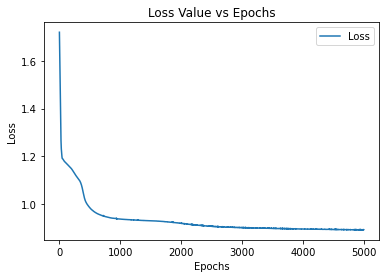

In [23]:
plt.plot(loss_values)
plt.title('Loss Value vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.show()

In [24]:
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

In [25]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    loss = criterion(y_pred, y_test)
    pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
    print ("Accuracy : {}%".format(100*pred/len(x_test)))

Accuracy : 59.79021072387695%
